# Data Preparation

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 30

## Load Data

In [2]:
def load_data(path):
    """
    Description : loads data from csv file into a pandas dataframe
    
    Argument : path
    """
    
    df = pd.read_csv(path, parse_dates=['Date_Customer'])
    return df

In [3]:
# load training and test data
train = load_data("data/Train.csv")
test = load_data("data/Test.csv")

In [4]:
train.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,2014-06-22,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,2013-01-08,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,2013-11-21,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,2013-09-13,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,2014-01-21,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0


## User Defined Functions

In [5]:
def quality_report(df):
    """
    Description: Displays shape of dataset and quality of data in terms of missing values, unique numbers, datatypes etc.
    
    Arguments: Dataframe
    """
    
    print(f'The dataset contains {df.shape[0]} entries and {df.shape[1]} columns')
    dtypes = df.dtypes
    nunique = df.nunique()
    total_missing = df.isnull().sum().sort_values(ascending = False)
    percent_missing = (df.isnull().mean()*100).sort_values(ascending = False)
    quality_df  = pd.concat([total_missing, percent_missing, nunique, dtypes], axis=1, 
                            keys=['Total Missing', 'Percent Missing', 'Nunique', 'Dtype'])

    return quality_df

            
def numeric_distribution_plot(df):
    """
    Description :returns distribution plot for all the numeric features in the dataframe
    
    Argument : Dataframe
    """
    for col in df.select_dtypes(exclude='object').columns.to_list():
        print("\n", "="*20, col, "="*20)
        plt.figure(figsize=(6,4))
        plt.title(f"Distribution of {col}")
        ax = sns.distplot(df[col].dropna())
        plt.tight_layout()
        plt.show()

## Quick EDA

In [5]:
# train.isnull().sum()

In [6]:
# check for missing values, unique values in each column and each columns datatype
quality_report(train)

The dataset contains 1568 entries and 27 columns


,Total Missing,Percent Missing,Nunique,Dtype
Disposable_Income,16,1.020408,1431,float64
ID,0,0.000000,1568,object
Amount_on_Fruits,0,0.000000,148,int64
Any_Complain,0,0.000000,2,int64
Cmp2Accepted,0,0.000000,2,int64
Cmp1Accepted,0,0.000000,2,int64
Cmp5Accepted,0,0.000000,2,int64
Cmp4Accepted,0,0.000000,2,int64
Cmp3Accepted,0,0.000000,2,int64
WebVisitsMonth,0,0.000000,16,int64


<AxesSubplot:xlabel='Response', ylabel='count'>

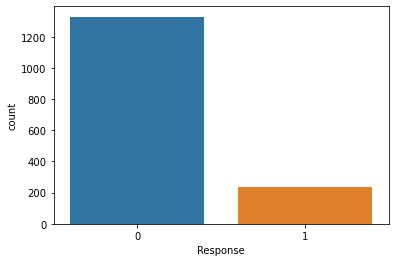

In [7]:
# check distribution of target values
sns.countplot(train['Response'])

In [8]:
# describe training data
train.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
count,1568.000000,1552.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,1970.073342,62381.186598,0.460459,0.497449,55.408801,2.292730,4.001276,2.665816,5.703444,303.190051,29.091199,168.376276,37.166454,26.800383,43.739158,5.326531,0.072704,0.072704,0.080357,0.064413,0.012755,0.008291,0.152423
std,11.920781,32089.169563,0.540361,0.544151,28.788037,1.937544,2.773748,3.043493,3.260553,340.141396,39.565637,233.419980,53.994951,40.857657,51.591557,2.468023,0.259733,0.259733,0.271932,0.245566,0.112252,0.090705,0.359546
min,1900.000000,2076.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,41612.400000,0.000000,0.000000,31.000000,1.000000,2.000000,0.000000,3.000000,27.000000,4.000000,15.000000,3.000000,1.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1971.000000,60964.200000,0.000000,0.000000,56.000000,2.000000,3.000000,2.000000,5.000000,167.000000,11.000000,64.000000,12.000000,8.000000,25.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1979.000000,81493.200000,1.000000,1.000000,80.000000,3.000000,6.000000,4.000000,8.000000,499.500000,36.000000,232.000000,49.250000,33.000000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,799999.200000,2.000000,2.000000,106.000000,15.000000,27.000000,28.000000,13.000000,1498.000000,202.000000,1725.000000,259.000000,263.000000,362.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



 ==================== Year_of_Birth ====================


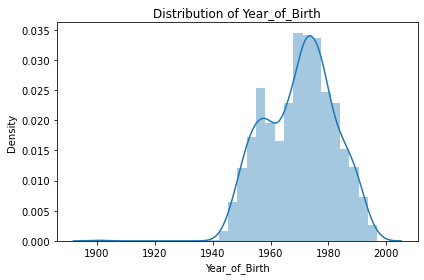


 ==================== Disposable_Income ====================


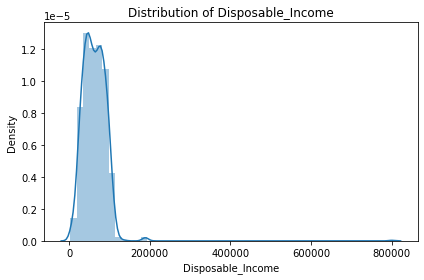


 ==================== No_of_Kids_in_home ====================


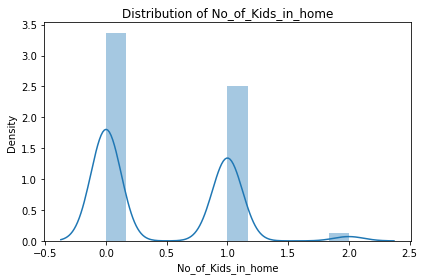


 ==================== No_of_Teen_in_home ====================


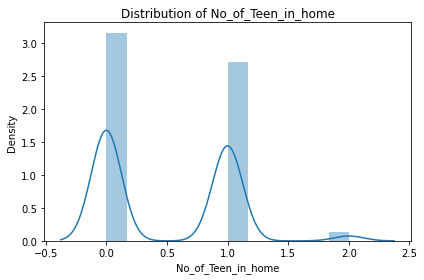


 ==================== Date_Customer ====================


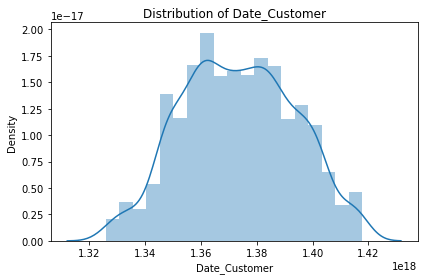


 ==================== Recency ====================


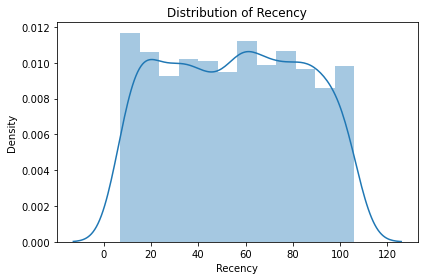


 ==================== Discounted_Purchases ====================


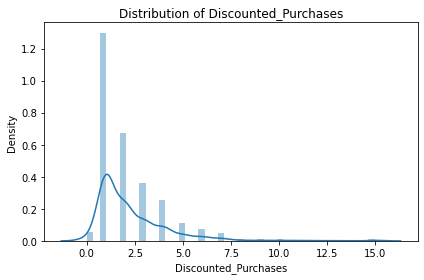


 ==================== WebPurchases ====================


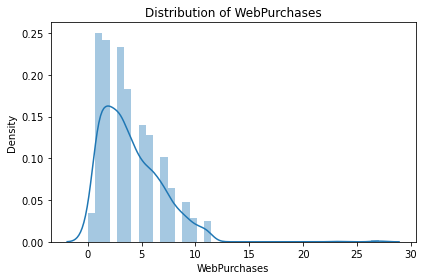


 ==================== CatalogPurchases ====================


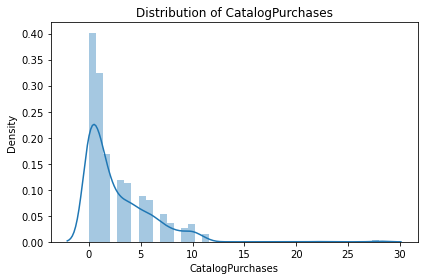


 ==================== StorePurchases ====================


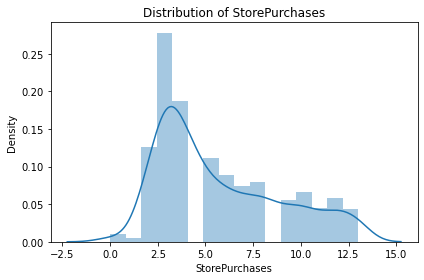


 ==================== Amount_on_Wines ====================


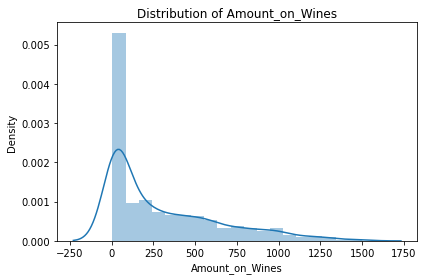


 ==================== Amount_on_Fruits ====================


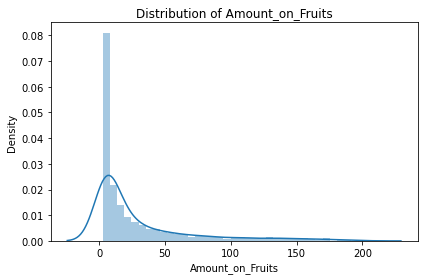


 ==================== Amount_on_MeatProducts ====================


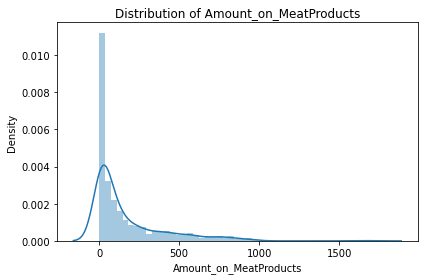


 ==================== Amount_on_FishProducts ====================


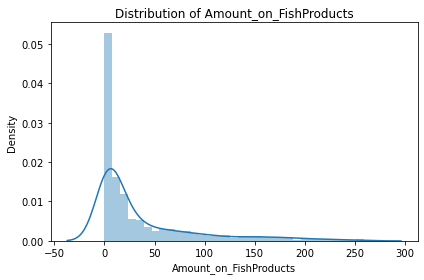


 ==================== Amount_on_SweetProducts ====================


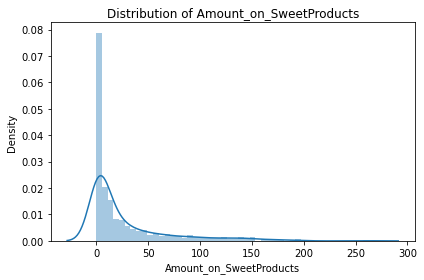


 ==================== Amount_on_GoldProds ====================


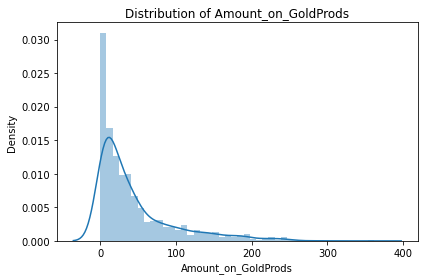


 ==================== WebVisitsMonth ====================


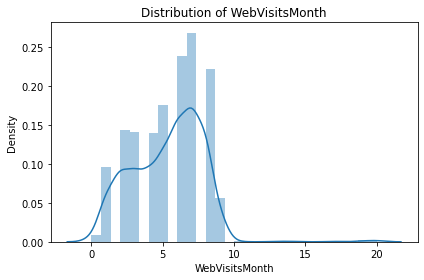


 ==================== Cmp3Accepted ====================


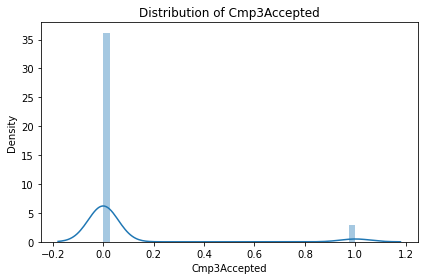


 ==================== Cmp4Accepted ====================


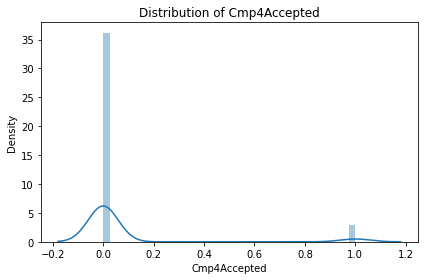


 ==================== Cmp5Accepted ====================


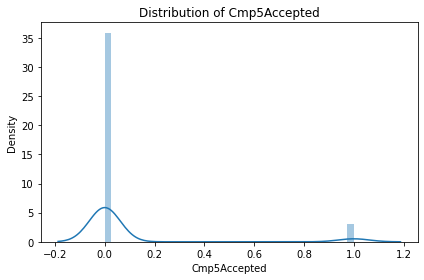


 ==================== Cmp1Accepted ====================


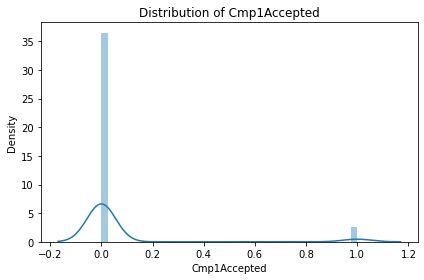


 ==================== Cmp2Accepted ====================


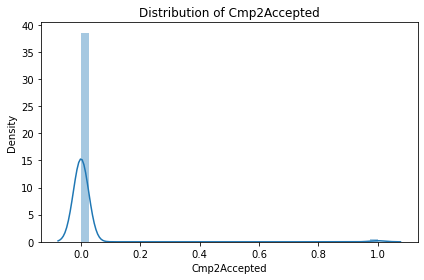


 ==================== Any_Complain ====================


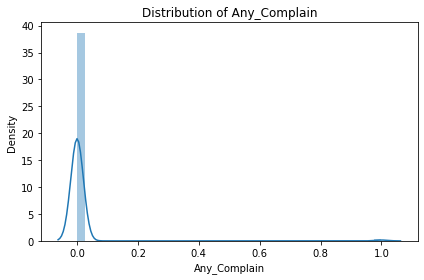


 ==================== Response ====================


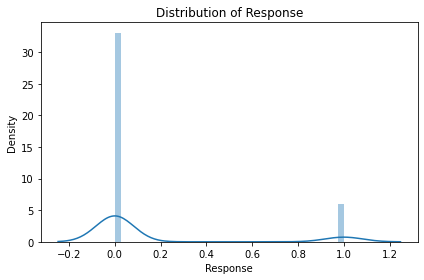

In [9]:
numeric_distribution_plot(train)

    - Most of the continuous features are normally distributed
    - Disposable income seem to have an outlier. We'll investigate this

### Dealing with Missing Values
Fill the missing Disposable_Income values with the median Disposable income

In [10]:
train.Disposable_Income.fillna(train.Disposable_Income.median(), inplace=True)
test.Disposable_Income.fillna(train.Disposable_Income.median(), inplace= True)

### Handling Outliers

<AxesSubplot:xlabel='Disposable_Income'>

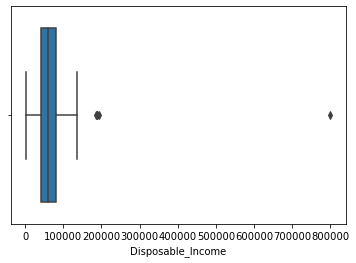

In [11]:
sns.boxplot(train['Disposable_Income'])

In [12]:
train[train.Disposable_Income > 200000]

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
190,ID_VIUX07W2,1978,Graduation,Together,799999.2,1,0,2013-02-06,30,4,3,1,3,14,17,18,8,1,12,6,0,0,0,0,0,0,0


In [13]:
# drop row with outlier disposable income
train = train.drop(190)

## Data Preprocessing
Next will be converting all Values to Numerical, as most AI and Machine Learning algorithms work better with numerical inputs. 

In [14]:
def encode_data(df):    
    # encoding education column values
    education = {
        "Basic": 1,
        "2n Cycle": 2,
        "Graduation": 3,
        "Master": 4,
        "PhD": 5,
    }

    df.Education_Level = df.Education_Level.map(education)

    # encoding marital status column values
    mar = {
        "Married"  :   1,
        "Together":    2,
        "Single":      3,
        "Divorced":    4,
        "Widow":       5,
        "Alone":       3,
        "YOLO":        6,
        "Absurd":      6
    }

    df.Marital_Status = df.Marital_Status.map(mar)
    #display(df)
    return df

In [15]:
# encode training and test data
train = encode_data(train)
test = encode_data(test)

## Feature Engineering

In [16]:
print(f"max date: {max(train.Date_Customer)}, min date: {min(train.Date_Customer)}")

max date: 2014-12-05 00:00:00, min date: 2012-01-08 00:00:00


In [17]:
def engineer_features(df):
    # engineer date features
    df['year'] = df.Date_Customer.dt.year
    df['month'] = df.Date_Customer.dt.month
    df['quarter'] = df.Date_Customer.dt.quarter

    df['year_month'] = df['year'].apply(str) + "_"  + df['month'].apply(str)
    df['year_month_int'], _ = pd.factorize(df['year_month'])  # encode the year_month values


    today = pd.to_datetime('2015-1-1')   # assuming we performed the analysis few days after the last recorded customer entry

    df['duration_days'] = (today - df['Date_Customer']).dt.days
    df['duration_months'] = ((today- df.Date_Customer)/np.timedelta64(1, 'M')).astype(int)

    df['is_month_end'] = df.Date_Customer.dt.is_month_end.astype(int)
    df['is_month_start'] = df.Date_Customer.dt.is_month_start.astype(int)
    
    
    # engineer recency features
    # bin_label = [1,2,3,4,5]
    df['Recency_bin'] = pd.qcut(df.Recency, q = [0, .2, .4, .6, .8, 1], labels=False)

    
    # engineer some more features
    purchases_features = ['Discounted_Purchases', 'WebPurchases', 'CatalogPurchases', 'StorePurchases']

    product_amount_features = ['Amount_on_Wines', 'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
                           'Amount_on_SweetProducts', 'Amount_on_GoldProds']
    
    df['total_purchases'] = df[purchases_features].sum(axis = 1)   # sum all purchases columns into one
    df['total_amount_on_products'] = df[product_amount_features].sum(axis = 1)  # sum all product amount columns into one
    df['no_of_children'] = df['No_of_Kids_in_home'] + df['No_of_Teen_in_home']
    
    num_features = df.select_dtypes(include = 'number').columns
    return df[num_features]

In [18]:
train = engineer_features(train)
test = engineer_features(test)

In [19]:
train.head()

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,...,Cmp2Accepted,Any_Complain,Response,year,month,quarter,year_month_int,duration_days,duration_months,is_month_end,is_month_start,Recency_bin,total_purchases,total_amount_on_products,no_of_children
0,1955,3,4,77504.4,1,1,56,2,1,1,4,71,3,16,0,...,0,0,0,2014,6,2,0,193,6,0,0,2,8,116,2
1,1958,3,2,56784.0,0,1,17,6,5,1,8,205,22,111,50,...,0,0,0,2013,1,1,1,723,23,0,0,0,20,422,1
2,1962,3,3,103714.8,0,0,17,0,7,4,7,469,31,873,29,...,0,0,1,2013,11,4,2,406,13,0,0,0,18,1457,0
3,1979,2,3,46311.6,1,0,49,3,4,1,3,56,15,49,17,...,0,0,0,2013,9,3,3,475,15,0,0,2,11,185,1
4,1959,3,1,87486.0,0,0,59,1,3,7,9,412,117,445,181,...,0,0,0,2014,1,1,4,345,11,0,0,2,20,1523,0


## Modelling

In [21]:
# !pip install catboost lightgbm

In [20]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import log_loss, f1_score, accuracy_score

In [21]:
# Separate training features from target
features = train.drop(['Response'], axis=1)
target = train['Response']

In [22]:
# apply a 80/20 train-validation set split
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

### Baseline Models

In [23]:
# model building
model = XGBClassifier(scale_pos_weight = 8, max_depth = 6, n_estimators = 500, eval_metric='logloss')
model.fit(X_train, y_train)

preds_val = model.predict(X_val)  # make validation predictions
preds_test = model.predict(test)  # make test predictions

In [24]:
# Model evaluation
print(f'Model has an accuracy of {accuracy_score(y_val, preds_val)}')
print(f'Model has an f1 score of {f1_score(preds_val, y_val)}')

Model has an accuracy of 0.8694267515923567
Model has an f1 score of 0.5494505494505495


In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_val, preds_val))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       269
           1       0.54      0.56      0.55        45

    accuracy                           0.87       314
   macro avg       0.73      0.74      0.74       314
weighted avg       0.87      0.87      0.87       314



    - f1 score is a little above average, let's optimize for this by resampling our data

### Modelling with SMOTE

In [30]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy={1:1000, 0:1400}, random_state=42)
X_, y_ = sm.fit_resample(features, target)

In [31]:
# oof = out-of-fold
oof_f1=[]
oof_acc = []
oof_predictions=[]

params = {'learning_rate': 0.05,
         'subsample': 0.7845527188607021,
         'colsample_bytree': 0.6474680443294045,
         'max_depth': 8,
         'scale_pos_weight': 1}

fold = StratifiedKFold(n_splits=10)

k=1
for train_index, test_index in fold.split(X_, y_):
        
    X_train, X_val = X_.iloc[train_index], X_.iloc[test_index]
    y_train, y_val = y_.iloc[train_index], y_.iloc[test_index]

    model = LGBMClassifier(**params, n_estimators=1000)

    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val, y_val)], early_stopping_rounds=300,verbose=False) #early100
    predictions_val = model.predict(X_val)

    print(f'F1-score for fold {k}: {f1_score(y_val, predictions_val)}')
    k+=1                
    oof_f1.append(f1_score(y_val, predictions_val))
    oof_acc.append(accuracy_score(y_val, predictions_val))
    predictions_test = model.predict_proba(test)[:, -1]
    oof_predictions.append(predictions_test)


print(f'\nAverage training f1-score: {np.mean(oof_f1)}')    
print(f'\nAverage training accuracy-score: {np.mean(oof_acc)}')

F1-score for fold 1: 0.7126436781609196
F1-score for fold 2: 0.8314606741573033
F1-score for fold 3: 0.8808290155440415
F1-score for fold 4: 0.9259259259259259
F1-score for fold 5: 0.9611650485436893
F1-score for fold 6: 0.9313725490196078
F1-score for fold 7: 0.9245283018867924
F1-score for fold 8: 0.9611650485436893
F1-score for fold 9: 0.9801980198019802
F1-score for fold 10: 0.8899082568807339

Average training f1-score: 0.8999196518464683

Average training accuracy-score: 0.9195833333333333


In [32]:
print(classification_report(y_val, predictions_val))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       140
           1       0.82      0.97      0.89       100

    accuracy                           0.90       240
   macro avg       0.90      0.91      0.90       240
weighted avg       0.91      0.90      0.90       240



    That's it! Our model now has an accuracy of ~92% and f1-score of ~90%

#### Feature Importance

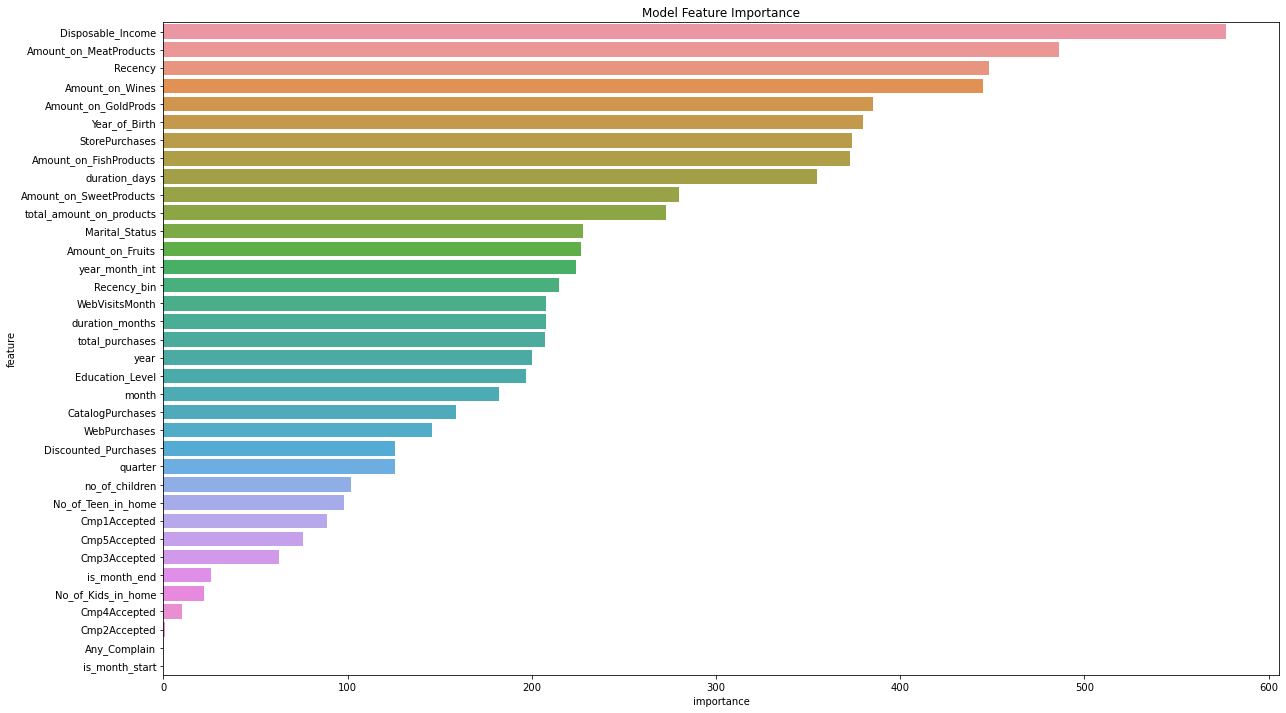

In [33]:
# 0.7831404345536787
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = features.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by=['importance'], ascending=False))
plt.title('Model Feature Importance')
plt.show()

In [34]:
# the model performs just as good with the
selected_features = (feature_importance_df.sort_values(by=['importance'], ascending=False).head(25))['feature'].values.tolist()

# we could retrain our model with these  new selected features .. but there isnt much difference in the model f1-score on doing this

## Prediction

In [35]:
submission = pd.read_csv('data/SampleSubmission.csv')
submission.head()

,ID,Response
0,ID_ZPMABNVX,NaN
1,ID_WFE91NAA,NaN
2,ID_JV11RBRK,NaN
3,ID_6B7SVKY9,NaN
4,ID_GOVUZ545,NaN


In [36]:
submission['Response'] = np.where(predictions_test > 0.45, 1, 0)
submission.head()

,ID,Response
0,ID_ZPMABNVX,0
1,ID_WFE91NAA,0
2,ID_JV11RBRK,0
3,ID_6B7SVKY9,0
4,ID_GOVUZ545,0


In [37]:
submission.to_csv('lgb_cat_5fold.csv', index = False)

#### Save Model

In [38]:
import joblib

In [39]:
# save model to disk
filename = 'customer_response_model.sav'
joblib.dump(model, filename)

['customer_response_model.sav']

In [37]:
# load model from disk
# loaded_model = joblib.load(filename)